In [2]:
#Import the packages to be used

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

%matplotlib inline

Text(0.5,0,'Value of Output from Linear Regression')

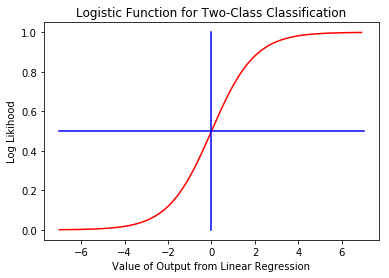

In [3]:
#We will be using a logistic regression which is a linear model, but with a binary response and distribution
 # Here's a simple example of the logistic function
    
xseq = np.arange(-7, 7, 0.1)

logisitic = [math.exp(v)/(1 + math.exp(v)) for v in xseq]

plt.plot(xseq, logisitic, color = 'red')
plt.plot([-7, 7], [0.5, 0.5], color = 'blue')
plt.plot([0, 0], [0, 1], color = 'blue')
plt.title('Logistic Function for Two-Class Classification')
plt.ylabel('Log Likihood')
plt.xlabel('Value of Output from Linear Regression')

In [4]:
#Load data previously prepared in data preparation step.

credit = pd.read_csv('German_Credit_Preped.csv')
print(credit.shape)
credit.head()

(1000, 22)


,customer_id,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,...,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit
0,1122334,< 0 DM,6,critical account - other non-bank loans,radio/television,1169,unknown/none,>= 7 years,4,male-single,...,real estate,67,none,own,2,skilled,1,yes,yes,0
1,6156361,0 - 200 DM,48,current loans paid,radio/television,5951,< 100 DM,1 - 4 years,2,female-divorced/separated/married,...,real estate,22,none,own,1,skilled,1,none,yes,1
2,2051359,none,12,critical account - other non-bank loans,education,2096,< 100 DM,4 - 7 years,2,male-single,...,real estate,49,none,own,1,unskilled-resident,2,none,yes,0
3,8740590,< 0 DM,42,current loans paid,furniture/equipment,7882,< 100 DM,4 - 7 years,2,male-single,...,building society savings/life insurance,45,none,for free,1,skilled,2,none,yes,0
4,3924540,< 0 DM,24,past payment delays,car (new),4870,< 100 DM,1 - 4 years,3,male-single,...,unknown-none,53,none,for free,2,skilled,2,none,yes,1


In [5]:
#Examine if class imbalance exists in data

credit_counts = credit[['credit_history', 'bad_credit']].groupby('bad_credit').count()
print(credit_counts)

            credit_history
bad_credit                
0                      700
1                      300


In [6]:
#Above- Knowing imbalance exists, the best accuracy we can get w/out creating a ML model is 70%.
 # This is achieved by guessing all customers will have good credit
    
#Below- Create a numpy array of label values

labels = np.array(credit['bad_credit'])

In [7]:
#Create a numpy array with all of the features (Model Matrix)
 # Encode categorical string variables into integers. 
 # Transform integer coded variables to dummy variables.
 # Append each dummy coded categorical variable to model matrix.
    
def encode_string(cat_features):
    enc = preprocessing.LabelEncoder()  # Encode strings to numeric categories
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    
    ohe = preprocessing.OneHotEncoder()  #Apply One Hot Encoder
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['credit_history', 'purpose', 'gender_status', 'time_in_residence', 'property']

Features = encode_string(credit['checking_account_status'])
for col in categorical_columns:
    temp = encode_string(credit[col])
    Features = np.concatenate([Features, temp], axis = 1)
    
print(Features.shape)
print(Features[:2, :])

(1000, 31)
[[0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 1. 0.]]


In [8]:
#Append numeric features to model matrix

Features = np.concatenate([Features, np.array(credit[['loan_duration_mo', 'loan_amount', 
                            'payment_pcnt_income', 'age_yrs']])], axis = 1)

print(Features.shape)
print(Features[:2, :])

(1000, 35)
[[0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.000e+00 0.000e+00 6.000e+00 1.169e+03 4.000e+00 6.700e+01]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 1.000e+00 0.000e+00 4.800e+01 5.951e+03 2.000e+00 2.200e+01]]


In [9]:
# 6 categorical variables were converted into 31 dummy variables. 
 
#Below- How many dummy variables came from checking_account_status? -4-
print(credit['checking_account_status'].unique())

['< 0 DM' '0 - 200 DM' 'none' '> 200 DM or salary assignment']


In [10]:
#Create randomly sampled training & test data (Bernoulli sample) sets from sklearn.model_selection package
 # 1st column = index array for training cases, 2nd column = index array for test cases

nr.seed(9988)  #set seed
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 300)

x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [11]:
#Rescale numeric variables to have similiar range of values, preventing undue influence on model training
 # Use Zscore to scale numerical feature w/ Scikit Learn preprocessing's StandardScaler 
 #applied first to training data, then same parameters are used on test data    

scaler = preprocessing.StandardScaler().fit(x_train[:, 34:])
x_train[:, 34:] = scaler.transform(x_train[:, 34:])
x_test[:, 34:] = scaler.transform(x_test[:, 34:])
x_train[:2, ]

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  3.90000000e+01,  4.93300000e+03,
         2.00000000e+00, -9.33823618e-01],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00

In [12]:
#Above- 4 numeric features are now scaled

#Below- Compute logistic regression model

logistic_mod = linear_model.LogisticRegression()  # define object using scikit-learn linear_model package
logistic_mod.fit(x_train, y_train)  # fit linear model using numpy arrays of features and the label w/in training data set

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
#Above- Config of model object printed using default settings (no arguments were given)

#Below- Examine model intercept & coefficients

print(logistic_mod.intercept_)
print(logistic_mod.coef_)

[-0.75272435]
[[ 4.58331724e-03  7.36655115e-01 -2.92902473e-01 -1.20106031e+00
   3.96176830e-01 -1.10844192e+00 -4.17435677e-01  7.61461074e-01
  -3.84484657e-01 -7.13338117e-02  4.84397335e-01 -6.40142587e-01
   1.08060282e-01  1.38739231e-01  2.74596025e-02 -2.49644445e-01
  -3.97846781e-01  6.27522813e-02 -2.15165460e-01 -1.10153109e-01
   5.22237639e-02 -8.74364862e-02 -6.07358520e-01 -5.31756945e-01
   2.04223418e-01 -3.59360554e-01 -6.58302701e-02 -2.64901324e-01
  -8.30279843e-02 -5.32576716e-01  1.27781674e-01  2.27780865e-02
   5.81879274e-05  1.97556732e-01 -1.74961672e-01]]


In [14]:
#Above- Intercept is -0.75. Dummy variables are in similiar range, indicating this model is likely to be overfit, given # of features.

#Below- Compute & display sample of class probabilities for test feature data set.
 #Class w/ highest probability is taken as score (prediction)
    
probabilities = logistic_mod.predict_proba(x_test)
print(probabilities[:15, :])

[[0.84511844 0.15488156]
 [0.39743042 0.60256958]
 [0.94262148 0.05737852]
 [0.32302235 0.67697765]
 [0.55221258 0.44778742]
 [0.9733398  0.0266602 ]
 [0.94899016 0.05100984]
 [0.62658645 0.37341355]
 [0.87725108 0.12274892]
 [0.927682   0.072318  ]
 [0.56204145 0.43795855]
 [0.4054608  0.5945392 ]
 [0.50097395 0.49902605]
 [0.67093045 0.32906955]
 [0.34388014 0.65611986]]


In [15]:
#Above- 1st column= probability of score 0, 2nd column= prob of score 1. Note prob score 0 is higher than for 1.

#Below- Transform class probabilities into class scores.
 # Set threshold to prob b/w 2 likelihoods at 0.5. This is applied to prob of score 0 below.
    
def score_model(probs, threshold):
    return np.array([1 if x> threshold else 0 for x in probs[:, 1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores[:15]))
print(y_test[:15])

[0 1 0 1 0 0 0 0 0 0 0 1 0 0 1]
[0 0 0 1 0 0 0 0 1 0 0 1 1 0 1]


In [16]:
#Above- Sample shows positive (1) predictions agree w/ test labels in 2nd row, but not all

#Below- Compute a confusion matrix as a metric to evaluate the results for the logisitic regression model
 #True Positive (TP)- cases w/ positive labels which have been correctly classified as positive
 #True Negative (TN)- cases w/ negative labels which have been correctly classified as negative
 #False Positive (FP)- cases w/ negative labels which have been incorrectly classified as positive
 #False Negative (FN)- cases w/ positive labels which have been incorrectly classified as negative
 # where positive is 1 and neagtive is 0
    
 #Accuracy/Bias- fraction of cases correctly classified
 #Precision- fraction of correctly calssified label cases out of all cases classified w/ that label value
   # is sentistive to the # of cases correctly classified for a given score value
 #Recall- fraction of cases of a label value correctly classified out of all cases for that have that label value
   # is sensitive to the # of cases correctly classified for a given true label value
 #F1- weighted average of precision and recall (overall model performance)
 #ROC- (receiver operating characteristic) displays relationship b/w TP rate on y and FP rate on x
 #AUC- (area/integral under the curve) overall performance of classifer model
   # higher the AUC, the lower the increase in FP rate req to achieve a req TP rate
     # Ideally AUC= 1.0, TP rate is achieved w/ 0 FP rate.
     # can compare classifiers, one w/ higher AUC is generally better
     # ROC diagonal for Bernoulli w/ AUC 0.5, anything greater than this is better than random guessing in balanced cases
    
#Below- Compute & examine the performance metrics for the classifier using precision_recall_fscore_support 
 # & accuracy_score functions from metric package in scikit-learn. Confusion matrix is computed through 
 # confusion_matrix from same package.

def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion Matrix ')
    print('                 Score Positive     Score Negative ')
    print('Actual Positive    %6d' % conf[0, 0] + '              %5d' % conf[0, 1])
    print('Actual Negative    %6d' % conf[1, 0] + '              %5d' % conf[1, 1])
    print('')
    print('Accuracy   %0.2f' % sklm.accuracy_score(labels, scores))
    print('')
    print('            Positive     Negative')
    print('Num Case    %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision   %6.2f' % metrics[0][0] + '        %6.2f' % metrics [0][1])
    print('Recall      %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1          %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][0])
    
    
print_metrics(y_test, scores)

                 Confusion Matrix 
                 Score Positive     Score Negative 
Actual Positive       182                 30
Actual Negative        39                 49

Accuracy   0.77

            Positive     Negative
Num Case       212            88
Precision     0.82          0.62
Recall        0.86          0.56
F1            0.84          0.84


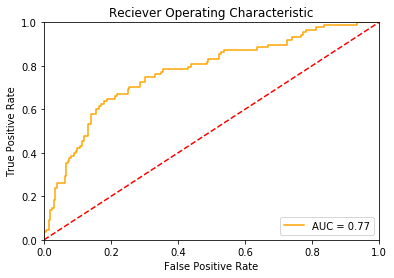

In [17]:
#Above- Confusion matrix, most positive cases correctly classified w/ 182 vs 30, but negative cases score incorrectly w/ 49 correct vs 39 incorrect.
 # Overall accuracy of 0.77 is extremely misleading, & should be regarded w/ healthy skepticism. Negative cases poorly identified.
 # Out of 300 cases, 212 positive & 88 negative, indicating class imbalance
 # Negative cases not classified as well as positive ones, shown by precision, recall, & F1.
# Negative cases are of greatest importance to the bank.


#Below- Compute & examine the ROC curve & AUC from metrics package w/in scikit-learn

def plot_auc(labels, probs):
    # Compute false positive rate, true positive rate & threshold along with the AUC 
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:, 1])
    auc = sklm.auc(fpr, tpr)
    
    plt.title('Reciever Operating Characteristic') #plot result
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)

C:\Users\Samantha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                 Confusion Matrix 
                 Score Positive     Score Negative 
Actual Positive       212                  0
Actual Negative        88                  0

Accuracy   0.71

            Positive     Negative
Num Case       212            88
Precision     0.71          0.00
Recall        1.00          0.00
F1            0.83          0.83


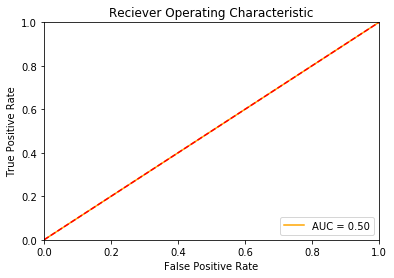

In [18]:
#Above- ROC curve is orange, above the red dotted line w/ AUC= 0.77.

#Below- To compare, the naive 'classifier', which is a hard coded algorithm, sets all cases to positive.

probs_positive = np.concatenate((np.ones((probabilities.shape[0], 1)),
                                np.zeros((probabilities.shape[0], 1))),
                               axis = 1)
scores_positive = score_model(probs_positive, 0.5)
print_metrics(y_test, scores_positive)
plot_auc(y_test, probs_positive)

In [19]:
#Above- Accuracy= 0.71, indicating class imbalance. ROC curve is directly on diagonal w/ AUC= 0.5.
 # The logistic regression classifier is better than this.
    
#Below- A Bad credit risk customer classified a good costs the bank 5* more than classifying a good credit risk customer as bad
 # The class imbalance in label has biased the training of the model. The accuracy b/w logistic & naive 'classifier' are not very different.

# Try to weigh results towards correctly classifying bad credit risk customers at expense of good credit risk customers.
 # Use LogisiticRegression function w/ argument of class_weight as 0.45 & 0.55.

logistic_mod = linear_model.LogisticRegression(class_weight = {0:0.45, 1:0.55})
logistic_mod.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 0.45, 1: 0.55}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [20]:
# Compute & examine class probabilities for each case

probabilities = logistic_mod.predict_proba(x_test)
print(probabilities[:15, :])

[[0.81450613 0.18549387]
 [0.35338572 0.64661428]
 [0.92963561 0.07036439]
 [0.28795618 0.71204382]
 [0.52008265 0.47991735]
 [0.96191182 0.03808818]
 [0.92875665 0.07124335]
 [0.57782686 0.42217314]
 [0.84875307 0.15124693]
 [0.89692827 0.10307173]
 [0.52185474 0.47814526]
 [0.37615598 0.62384402]
 [0.46802562 0.53197438]
 [0.6380623  0.3619377 ]
 [0.31248832 0.68751168]]


                 Confusion Matrix 
                 Score Positive     Score Negative 
Actual Positive       177                 35
Actual Negative        34                 54

Accuracy   0.77

            Positive     Negative
Num Case       212            88
Precision     0.84          0.61
Recall        0.83          0.61
F1            0.84          0.84


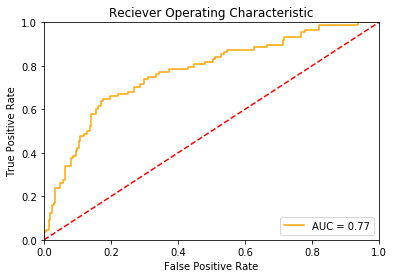

In [21]:
#Above- probabilities don't look much different from unweighted model

#Below- Compute & examine the scores & metrics to compare weighted vs. unweighted.

scores = score_model(probabilities, 0.5)
print_metrics(y_test, scores)
plot_auc(y_test, probabilities)

In [22]:
#Above- Accuracy increased slightly to 0.77. Precision, recall, & F1 are slightly better for negative cases.
 # Weighting has helped a little bit. ROC curve & AUC essentially unchanged.
    
#Another way to improve the model is to adjust the scoring threshold.
 #Use for loop to evaluate scoring for model at different threshold values.
    
def test_threshold(probs, labels, threshold):
    scores = score_model(probs, threshold)
    print('')
    print('For Threshold = ' + str(threshold))
    print_metrics(labels, scores)
    
thresholds = [0.45, 0.40, 0.35, 0.30, 0.25]
for t in thresholds:
    test_threshold(probabilities, y_test, t)


For Threshold = 0.45
                 Confusion Matrix 
                 Score Positive     Score Negative 
Actual Positive       164                 48
Actual Negative        29                 59

Accuracy   0.74

            Positive     Negative
Num Case       212            88
Precision     0.85          0.55
Recall        0.77          0.67
F1            0.81          0.81

For Threshold = 0.4
                 Confusion Matrix 
                 Score Positive     Score Negative 
Actual Positive       151                 61
Actual Negative        26                 62

Accuracy   0.71

            Positive     Negative
Num Case       212            88
Precision     0.85          0.50
Recall        0.71          0.70
F1            0.78          0.78

For Threshold = 0.35
                 Confusion Matrix 
                 Score Positive     Score Negative 
Actual Positive       142                 70
Actual Negative        22                 66

Accuracy   0.69

            Positi

In [ ]:
#Above- As threshold is decreased, # of correctly classified negative cases (bad credit customers) increases @ expense of correctly classifying positive cases (good credit customers).
 # Note accuracy decreases, still no very useful metric. Also note, # of FN (misclassified good credit customers) is ~4* that of FP (misclassified bad credit customers).
    
##Summary
 # 1) Continued to prepare credit risk data using scikit-learn. Encoded categorical variables into dummy variables, scaled numeric features, and added both to numpy array of features & numpy array of label values.
 # 2) Computed logistic model.
 # 3) Compared performance of model using multiple metrics.
    # Accuracy metric not too useful. Compared accuracy w/ naive 'classifier' accuracy, but not much better due to class imbalance.
    # Confusion matrix, precision, recall, & F1 are useful when considered together.
 #4) Reweighed labels & changed decision threshold for reweighted model. Both helped some of the class imbalance, but decision is an overall business decision on which threshold to pick for asymmetric cost of misclassification to bank.
